# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from sklearn.metrics import mean_absolute_percentage_error # library for evaluation  mape
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from sklearn.svm import SVR # library for SVR model training 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
import statsmodels.api as smapi

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ETH"
cryptoPair = "USDT"

trainTestSplit = 0.8

# Loading dataset

In [3]:
api_key = 'API' 
api_secret = 'SECRET_API'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
data = pd.DataFrame(klines)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data=data[['close']]
data = data.iloc[:-1 , :]

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head() # showing the first 5 rows of data

close
2021-01-01 03:59:59.999  744.82000000
2021-01-01 07:59:59.999  737.38000000
2021-01-01 11:59:59.999  738.85000000
2021-01-01 15:59:59.999  735.39000000
2021-01-01 19:59:59.999  725.34000000

### Five last records of data

In [5]:
data.tail() # showing the last 5 rows of data

close
2021-12-31 07:59:59.999  3721.88000000
2021-12-31 11:59:59.999  3780.92000000
2021-12-31 15:59:59.999  3784.64000000
2021-12-31 19:59:59.999  3626.27000000
2021-12-31 23:59:59.999  3676.23000000

### Coloumns/features in data

In [6]:
data.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 2190


### Shape of data

In [8]:
data.shape #shape of data

(2190, 1)

### Data information

In [9]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190 entries, 2021-01-01 03:59:59.999000 to 2021-12-31 23:59:59.999000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2190 non-null   object
dtypes: object(1)
memory usage: 34.2+ KB


### Data types of all coloumns

In [10]:
data.dtypes #data types of data

close    object
dtype: object

### Checking missing Values

In [11]:
data[data.isnull().any(axis=1)].head() #checking the null values 

Empty DataFrame
Columns: [close]
Index: []

### Count of missing values

In [12]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [13]:
data.isnull().values.any() #checking the null values 

False

### Counts of missing values in each column

In [14]:
data.isnull().sum() #checking the null values columns wise 

close    0
dtype: int64

### Data Description

In [15]:
data.describe() # statics of data 

close
count            2190
unique           2184
top     1208.42000000
freq                2

In [16]:
data['close']=data['close'].astype(float)

### Spliting date into day, month and year

In [17]:
data['date'] = data.index # taking dates in date column 
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data
data['Hour'] = data['date'].dt.hour # extracting year from data
data['Minutes'] = data['date'].dt.minute # extracting year from data

### Close price with respect to year 

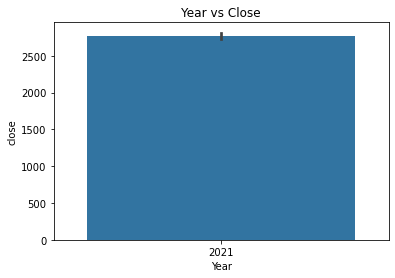

In [18]:
sns.barplot(x='Year', y='close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

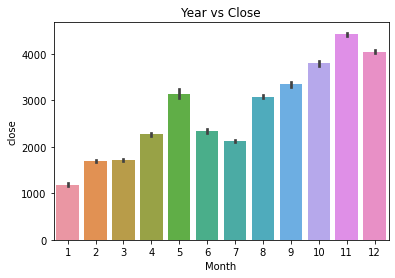

In [19]:
sns.barplot(x='Month', y='close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

### Close price with respect to Hour 

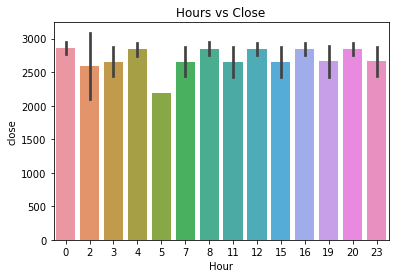

In [20]:
sns.barplot(x='Hour', y='close', data=data).set(title='Hours vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

### Close price with respect to Minutes 

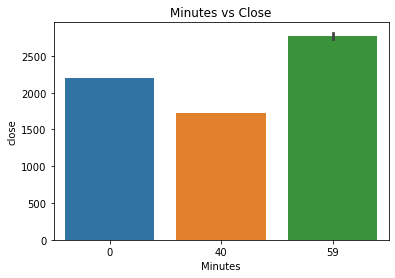

In [21]:
sns.barplot(x='Minutes', y='close', data=data).set(title='Minutes vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

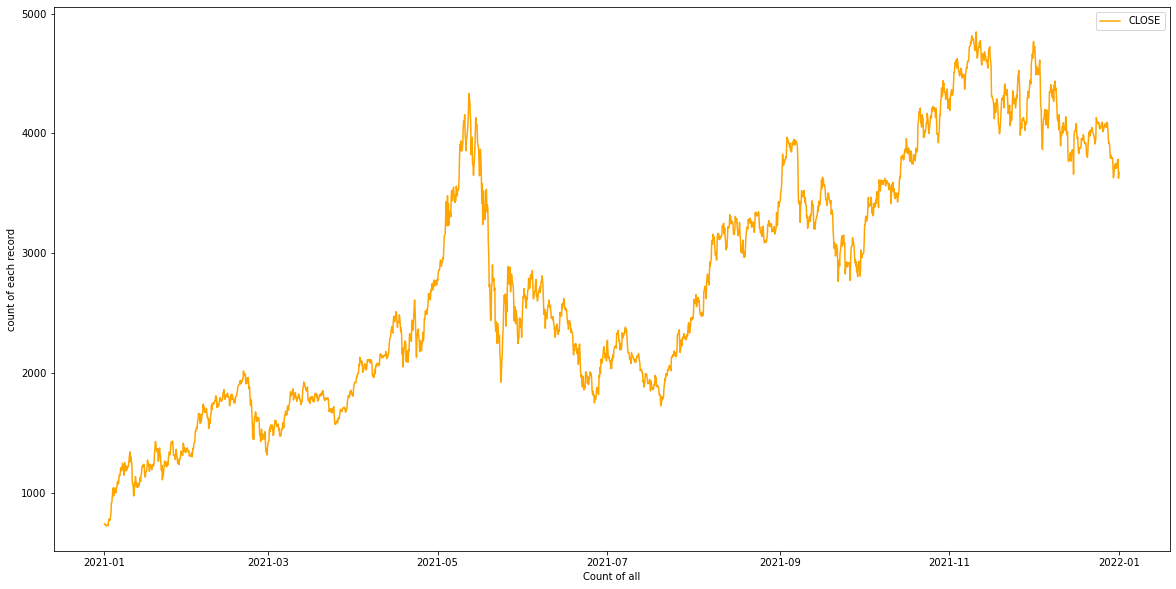

In [22]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

# Extracting the Indicators

# ------------------------------------------------------------------------------------------------------

### EMA and SMA 

### Moving average features

In [23]:
data['EMA_50'] = data['close'].ewm(50).mean().shift() # calculting the ema 50
data['EMA_200'] =data['close'].ewm(200).mean().shift() # calculting the ema 200
data['MA_50'] = data['close'].rolling(50).mean() # calculting the ma 50
data['MA_200'] = data['close'].rolling(200).mean() # calculting the ma 200
fig = go.Figure() #plot setting 
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50')) # plotting the ema 50
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200')) # plotting the ema 200
fig.add_trace(go.Scatter(x=data.index, y=data.close, name='close', line_color='dimgray', opacity=0.3)) # plotting the close
fig.show() #showing the plot 

In [24]:
fig = go.Figure() #plot setting 
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50')) # plotting the ma 50
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200')) # plotting the ma 200
fig.add_trace(go.Scatter(x=data.index, y=data.close, name='close', line_color='dimgray', opacity=0.3)) # plotting the close 
fig.show() # showing plot 

# Final Data after features extraction and preparation

In [25]:
data=data.tail(len(data)-200) # ignoring the first 200 rows as there are Nan/missing values 
data #data 

close                    date  Month  Day  Year  \
2021-02-03 11:59:59.999  1537.68 2021-02-03 11:59:59.999      2    3  2021   
2021-02-03 15:59:59.999  1597.25 2021-02-03 15:59:59.999      2    3  2021   
2021-02-03 19:59:59.999  1616.10 2021-02-03 19:59:59.999      2    3  2021   
2021-02-03 23:59:59.999  1664.49 2021-02-03 23:59:59.999      2    3  2021   
2021-02-04 03:59:59.999  1645.84 2021-02-04 03:59:59.999      2    4  2021   
...                          ...                     ...    ...  ...   ...   
2021-12-31 07:59:59.999  3721.88 2021-12-31 07:59:59.999     12   31  2021   
2021-12-31 11:59:59.999  3780.92 2021-12-31 11:59:59.999     12   31  2021   
2021-12-31 15:59:59.999  3784.64 2021-12-31 15:59:59.999     12   31  2021   
2021-12-31 19:59:59.999  3626.27 2021-12-31 19:59:59.999     12   31  2021   
2021-12-31 23:59:59.999  3676.23 2021-12-31 23:59:59.999     12   31  2021   

                         Hour  Minutes       EMA_50      EMA_200      MA_50  \
2021-02-03 11:59:59.999    11       59  1320.593118  1242.431000  1354.4676   
2021-02-03 15:59:59.999    15       59  1324.930749  1244.751400  1360.0644   
2021-02-03 19:59:59.999    19       59  1330.369951  1247.513765  1366.1172   
2021-02-03 23:59:59.999    23       59  1336.074930  1250.393961  1373.8080   
2021-02-04 03:59:59.999     3       59  1342.629821  1253.620617  1379.8860   
...                       ...      ...          ...          ...        ...   
2021-12-31 07:59:59.999     7       59  3955.552391  4035.849483  3942.6452   
2021-12-31 11:59:59.999    11       59  3950.970579  4034.287417  3939.0518   
2021-12-31 15:59:59.999    15       59  3947.636254  4033.026860  3936.5126   
2021-12-31 19:59:59.999    19       59  3944.440249  4031.791082  3930.3516   
2021-12-31 23:59:59.999    23       59  3938.201617  4029.773527  3924.8632   

                             MA_200  
2021-02-03 11:59:59.999  1208.24450  
2021-02-03 15:59:59.999  1212.54385  
2021-02-03 19:59:59.999  1216.93010  
2021-02-03 23:59:59.999  1221.57560  
2021-02-04 03:59:59.999  1226.17810  
...                             ...  
2021-12-31 07:59:59.999  4085.25265  
2021-12-31 11:59:59.999  4084.02710  
2021-12-31 15:59:59.999  4082.60375  
2021-12-31 19:59:59.999  4080.25210  
2021-12-31 23:59:59.999  4078.24455  

[1990 rows x 11 columns]

# -----------------------------------------------------------------------------------------------------------

### Loading the whale data

In [26]:
priceData=pd.read_csv('Datasets/dataFileWhaleETH.csv')

In [27]:
li = priceData['tweet'].str.lower().str.cat(sep=' ')

# Getting Tokenization of the text

In [28]:
priceData = priceData[['date','time','tweet']]
priceData['tweet'].head()

0    🚨 🚨  20,000,000 #USDT (20,000,000 USD) transfe...
1    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
2    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
3    🚨 🚨 🚨  29,999,998 #USDT (29,999,998 USD) trans...
4    🚨 🚨 🚨 🚨 🚨 🚨  69,997,439 #USDT (69,997,439 USD)...
Name: tweet, dtype: object

In [29]:
#nums = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'][0]
#data['amountTransfer'] = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'])[0]
priceData['amountTransfer'] = priceData['tweet'].str.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)')
priceData['amountTransfer'] = priceData['amountTransfer'].str[1]

In [30]:
data['whaleCount'] = 0

In [31]:
for i, row in enumerate(priceData.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 1
    else:
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 1

# -----------------------------------------------------------------------------------------------------------

### Loading the twitter data

In [32]:
sentData=pd.read_csv('Datasets/dataFileETH.csv')

In [33]:
li = sentData['tweet'].str.lower().str.cat(sep=' ')

# Removing punctuation,numbers and returns list of words

In [34]:
li2 = re.sub('[^A-Za-z]+', ' ', li)

# Removing the stopwords from the text

In [35]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')        
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Getting Tokenization of the text

In [36]:
word_tokens = word_tokenize(li2)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Removing characters which have length less than 2  

In [37]:
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Removing numbers

In [38]:
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

# Frequency distribution of aspect words 

In [39]:
word_dist = nltk.FreqDist(cleaned_data_title)
top100_words = pd.DataFrame(word_dist.most_common(100),
                    columns=['Word', 'Frequency'])

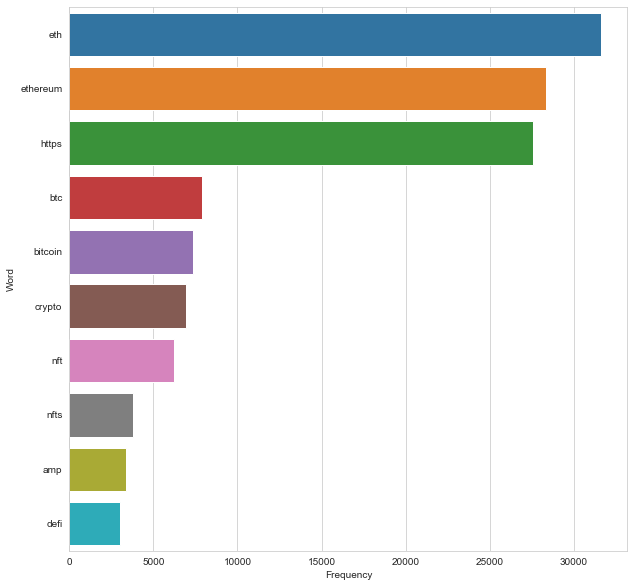

In [40]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

# SentimentIntensityAnalyzer for getting sentiments

In [41]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [42]:
sentData["Polarity"] = sentData["tweet"].apply(sentiment)

In [43]:
sentData = sentData[['date','time','tweet','Polarity']]

In [44]:
sentData.tail()

date      time  \
26578  2021-01-01  09:10:30   
26579  2021-01-01  02:36:03   
26580  2021-01-01  02:21:05   
26581  2021-01-01  00:50:48   
26582  2021-01-01  00:14:10   

                                                   tweet  Polarity  
26578  ✨🎨NFT GIVEAWAY!🎨✨  7 lucky winners will receiv...    0.9622  
26579  My 2021 predictions for Ethereum:  -Eth2 phase...    0.2023  
26580  🔮 2021 #Ethereum Predictions 🔮  • $420B locked...    0.0000  
26581  67,270 with 2,170,914 ETH deposited. (1.6B @ 7...    0.6792  
26582        Have fun becoming rich. 🤗  $ETH ⟠ #Ethereum    0.8658

# Getting sentiments based on the popularity score

In [45]:
def sentiments(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [46]:
sentData['Sentiments'] = sentData.apply(sentiments, axis=1)

# sentiments with their counts

In [47]:
sentData['Sentiments'].value_counts()

Positive    14323
Neutral      8007
Negative     4253
Name: Sentiments, dtype: int64

In [48]:
sentData.iloc[:25]

date      time                                              tweet  \
0   2021-12-30  23:57:01  Look what I found! Two locks with cherry colle...   
1   2021-12-30  23:50:13  Don’t forget to lock your tokens!😁  Time is al...   
2   2021-12-30  23:43:25  0.3 ETH ($900)   NFT Giveaway 🦘🦘 Partnered wit...   
3   2021-12-30  23:38:38  🎉#NFTGiveaway🎉   🎁One lucky winner will get a ...   
4   2021-12-30  23:29:45  🦋"Daydream"🦋 is almost  ready for you all !❤️🥀...   
5   2021-12-30  23:18:02  Punk 8808 bought for 107 ETH ($397,449.36 USD)...   
6   2021-12-30  22:44:43  🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢 Join @MulChainCapital  Upcoming $...   
7   2021-12-30  22:40:18  Aqui echando el rato hasta que bajen las fees ...   
8   2021-12-30  22:22:05  🎉#NFTGiveaway🎉   🎁Giving away 4 @LuckyHamsterS...   
9   2021-12-30  22:21:16  if you got the ENS airdrop, congratulations:  ...   
10  2021-12-30  22:16:17            #eth #Ethereum  https://t.co/nqG9EoF2Zc   
11  2021-12-30  22:05:09  #NewProfilePic #BGK #BGKTAKEOVER #NFT #ETH #Et...   
12  2021-12-30  21:53:25  We have been receiving a lot of questions aski...   
13  2021-12-30  21:47:57  On August 5th, EIP-1559 was implemented, integ...   
14  2021-12-30  21:47:12  Gas DAO Community Giveaway ⛽️   I’m doing a NF...   
15  2021-12-30  21:06:28  146 days ago the #Ethereum network implemented...   
16  2021-12-30  20:12:18  #NFTGIVEAWAY   @bbvsea is giving away (1) Exot...   
17  2021-12-30  20:11:16  This is just the beginning for @mongoosecoinet...   
18  2021-12-30  20:07:37  Everyone into #NFTs  should peep to the @Arabi...   
19  2021-12-30  20:07:10  #Ethereum top analysis. 9.8k - 11.2k most like...   
20  2021-12-30  20:00:14  Smart contracts are the wrong tool for handlin...   
21  2021-12-30  19:43:48  #Ethereum alternative, better solution or even...   
22  2021-12-30  19:35:33  Pim~ Pom~ This Genesis 3D animation still wait...   
23  2021-12-30  19:13:55  Punk 3491 bought for 0.01 ETH ($37.40 USD) by ...   
24  2021-12-30  19:06:53  Punk 3491 bought for 0.01 ETH ($37.40 USD) by ...   

    Polarity Sentiments  
0     0.0000    Neutral  
1     0.6588   Positive  
2     0.3818   Positive  
3     0.9184   Positive  
4     0.6122   Positive  
5     0.0000    Neutral  
6     0.2960   Positive  
7     0.8074   Positive  
8     0.9286   Positive  
9     0.8271   Positive  
10    0.0000    Neutral  
11    0.0000    Neutral  
12   -0.1027   Negative  
13    0.0000    Neutral  
14    0.9229   Positive  
15   -0.2263   Negative  
16    0.4215   Positive  
17   -0.4215   Negative  
18   -0.8834   Negative  
19    0.1027   Positive  
20   -0.3935   Negative  
21   -0.0258    Neutral  
22    0.0000    Neutral  
23    0.0000    Neutral  
24    0.0000    Neutral

In [49]:
data['sentimentCount'] = 0

In [50]:
for i, row in enumerate(sentData.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] -= 1
    else:
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] -= 1

In [51]:
data.head()

close                    date  Month  Day  Year  \
2021-02-03 11:59:59.999  1537.68 2021-02-03 11:59:59.999      2    3  2021   
2021-02-03 15:59:59.999  1597.25 2021-02-03 15:59:59.999      2    3  2021   
2021-02-03 19:59:59.999  1616.10 2021-02-03 19:59:59.999      2    3  2021   
2021-02-03 23:59:59.999  1664.49 2021-02-03 23:59:59.999      2    3  2021   
2021-02-04 03:59:59.999  1645.84 2021-02-04 03:59:59.999      2    4  2021   

                         Hour  Minutes       EMA_50      EMA_200      MA_50  \
2021-02-03 11:59:59.999    11       59  1320.593118  1242.431000  1354.4676   
2021-02-03 15:59:59.999    15       59  1324.930749  1244.751400  1360.0644   
2021-02-03 19:59:59.999    19       59  1330.369951  1247.513765  1366.1172   
2021-02-03 23:59:59.999    23       59  1336.074930  1250.393961  1373.8080   
2021-02-04 03:59:59.999     3       59  1342.629821  1253.620617  1379.8860   

                             MA_200  whaleCount  sentimentCount  
2021-02-03 11:59:59.999  1208.24450           0               7  
2021-02-03 15:59:59.999  1212.54385          43               7  
2021-02-03 19:59:59.999  1216.93010          37               3  
2021-02-03 23:59:59.999  1221.57560           7               9  
2021-02-04 03:59:59.999  1226.17810          29               2

In [52]:
def adjustDatasetPredict(model):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 

    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]

        X_train=first90.drop(columns=['close','date']) #dropping the 'Close','date'
        y_train=first90['close'] # output close 
        newDataframe = pd.DataFrame().append([row[1]])
        X_test = newDataframe.drop(columns=['close','date'])

        prediction_test = model.predict(X_test)
        returnVal.append(prediction_test[0])
        row[1]['close'] = prediction_test[0]

        first90 = first90.append([row[1]])

        first90['EMA_50'] = first90['close'].ewm(50).mean().shift() # calculting the ema 50
        first90['EMA_200'] =first90['close'].ewm(200).mean().shift() # calculting the ema 200
        first90['MA_50'] = first90['close'].rolling(50).mean() # calculting the ma 50
        first90['MA_200'] = first90['close'].rolling(200).mean() # calculting the ma 200
    
    return returnVal

def adjustDatasetPredictSARIMAX(best_cfg):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 
     
    second10['EMA_50'] = np.nan
    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]
        
        newDataframe = pd.DataFrame().append([row[1]])
        newDataframe['close'].loc[:] = np.nan
        df6 = pd.concat([first90,newDataframe])

        model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']],order=(best_cfg),seasonal_order=(1,1,1,12))
        results=model.fit()
        
        preds = results.predict(start=len(df6), end=len(df6), exog=newDataframe[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']], dynamic = True)
        predSeries = pd.Series(preds.tolist())
        
        returnVal.append(predSeries[0])
        row[1]['close'] = predSeries[0]
        new90 = first90.append([row[1]])

        new90['EMA_50'] = new90['close'].ewm(50).mean().shift() # calculting the ema 50
        new90['EMA_200'] =new90['close'].ewm(200).mean().shift() # calculting the ema 200
        new90['MA_50'] = new90['close'].rolling(50).mean() # calculting the ma 50
        new90['MA_200'] = new90['close'].rolling(200).mean() # calculting the ma 200
        first90 = first90.append(new90.iloc[-1])
        print(first90.iloc[-1])
    return returnVal

def adjustDatasetPredictARIMAX(best_cfg):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 
     
    second10['EMA_50'] = np.nan
    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]
        
        newDataframe = pd.DataFrame().append([row[1]])
        newDataframe['close'].loc[:] = np.nan
        df6 = pd.concat([first90,newDataframe])

        model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']],order=(best_cfg))
        results=model.fit()
        
        preds = results.predict(start=len(df6), end=len(df6), exog=newDataframe[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']], dynamic = True)
        predSeries = pd.Series(preds.tolist())
        
        returnVal.append(predSeries[0])
        row[1]['close'] = predSeries[0]
        new90 = first90.append([row[1]])

        new90['EMA_50'] = new90['close'].ewm(50).mean().shift() # calculting the ema 50
        new90['EMA_200'] =new90['close'].ewm(200).mean().shift() # calculting the ema 200
        new90['MA_50'] = new90['close'].rolling(50).mean() # calculting the ma 50
        new90['MA_200'] = new90['close'].rolling(200).mean() # calculting the ma 200
        first90 = first90.append(new90.iloc[-1])
        print(first90.iloc[-1])
    return returnVal

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [53]:
X=data.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

Month  Day  Year  Hour  Minutes       EMA_50  \
2021-02-03 11:59:59.999      2    3  2021    11       59  1320.593118   
2021-02-03 15:59:59.999      2    3  2021    15       59  1324.930749   
2021-02-03 19:59:59.999      2    3  2021    19       59  1330.369951   
2021-02-03 23:59:59.999      2    3  2021    23       59  1336.074930   
2021-02-04 03:59:59.999      2    4  2021     3       59  1342.629821   
...                        ...  ...   ...   ...      ...          ...   
2021-12-31 07:59:59.999     12   31  2021     7       59  3955.552391   
2021-12-31 11:59:59.999     12   31  2021    11       59  3950.970579   
2021-12-31 15:59:59.999     12   31  2021    15       59  3947.636254   
2021-12-31 19:59:59.999     12   31  2021    19       59  3944.440249   
2021-12-31 23:59:59.999     12   31  2021    23       59  3938.201617   

                             EMA_200      MA_50      MA_200  whaleCount  \
2021-02-03 11:59:59.999  1242.431000  1354.4676  1208.24450           0   
2021-02-03 15:59:59.999  1244.751400  1360.0644  1212.54385          43   
2021-02-03 19:59:59.999  1247.513765  1366.1172  1216.93010          37   
2021-02-03 23:59:59.999  1250.393961  1373.8080  1221.57560           7   
2021-02-04 03:59:59.999  1253.620617  1379.8860  1226.17810          29   
...                              ...        ...         ...         ...   
2021-12-31 07:59:59.999  4035.849483  3942.6452  4085.25265           0   
2021-12-31 11:59:59.999  4034.287417  3939.0518  4084.02710           0   
2021-12-31 15:59:59.999  4033.026860  3936.5126  4082.60375           0   
2021-12-31 19:59:59.999  4031.791082  3930.3516  4080.25210           0   
2021-12-31 23:59:59.999  4029.773527  3924.8632  4078.24455           0   

                         sentimentCount  
2021-02-03 11:59:59.999               7  
2021-02-03 15:59:59.999               7  
2021-02-03 19:59:59.999               3  
2021-02-03 23:59:59.999               9  
2021-02-04 03:59:59.999               2  
...                                 ...  
2021-12-31 07:59:59.999               0  
2021-12-31 11:59:59.999               0  
2021-12-31 15:59:59.999               0  
2021-12-31 19:59:59.999               0  
2021-12-31 23:59:59.999               0  

[1990 rows x 11 columns]

### Taking target as output

In [54]:
y=data['close'] # output close 
y #output 

2021-02-03 11:59:59.999    1537.68
2021-02-03 15:59:59.999    1597.25
2021-02-03 19:59:59.999    1616.10
2021-02-03 23:59:59.999    1664.49
2021-02-04 03:59:59.999    1645.84
                            ...   
2021-12-31 07:59:59.999    3721.88
2021-12-31 11:59:59.999    3780.92
2021-12-31 15:59:59.999    3784.64
2021-12-31 19:59:59.999    3626.27
2021-12-31 23:59:59.999    3676.23
Name: close, Length: 1990, dtype: float64

### Spliting the data into training and Testing

In [55]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# ARIMAX Model

### Parametrs

In [56]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])
    #exog = np.empty([df6['EMA_50'], df6['EMA_200'],df6['MA_50'],df6['MA_200']])
    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=197.560
ARIMA(0, 0, 1) RMSE=203.748
ARIMA(0, 0, 2) RMSE=191.438
ARIMA(0, 1, 0) RMSE=381.055
ARIMA(0, 1, 1) RMSE=710.559
ARIMA(0, 1, 2) RMSE=2094.569
ARIMA(0, 2, 0) RMSE=4645.808
ARIMA(0, 2, 1) RMSE=5899.500
ARIMA(0, 2, 2) RMSE=5906.578
ARIMA(1, 0, 0) RMSE=886.774
ARIMA(1, 0, 1) RMSE=1221.806
ARIMA(1, 0, 2) RMSE=2829.271
ARIMA(1, 1, 0) RMSE=10455.387
ARIMA(1, 1, 1) RMSE=20559.980
ARIMA(1, 1, 2) RMSE=20216.644
ARIMA(1, 2, 0) RMSE=6032.245
ARIMA(1, 2, 1) RMSE=6029.401
ARIMA(1, 2, 2) RMSE=4252.628
ARIMA(2, 0, 0) RMSE=7908.084
ARIMA(2, 0, 1) RMSE=882.947
ARIMA(2, 0, 2) RMSE=5339.531
ARIMA(2, 1, 0) RMSE=22171.796
ARIMA(2, 1, 1) RMSE=10518.534
ARIMA(2, 1, 2) RMSE=19331.766
ARIMA(2, 2, 0) RMSE=5941.005
ARIMA(2, 2, 1) RMSE=5933.314
ARIMA(2, 2, 2) RMSE=5872.425
ARIMA(4, 0, 0) RMSE=7151.573
ARIMA(4, 0, 1) RMSE=53149.497
ARIMA(4, 0, 2) RMSE=5443.047
ARIMA(4, 1, 0) RMSE=9106.778
ARIMA(4, 1, 1) RMSE=6078.158
ARIMA(4, 1, 2) RMSE=19833.130
ARIMA(4, 2, 0) RMSE=6087.377
ARIMA(4, 2, 1

In [57]:
%%time
y_pred_test = adjustDatasetPredictARIMAX(best_cfg)

close                            4148.784675
date              2021-10-26 20:59:59.999000
Month                                     10
Day                                       26
Year                                    2021
Hour                                      20
Minutes                                   59
EMA_50                           3882.928331
EMA_200                          3444.958128
MA_50                            4039.612094
MA_200                           3543.937823
whaleCount                                 0
sentimentCount                             0
Name: 2021-10-26 20:59:59.999000, dtype: object
close                            4168.716259
date              2021-10-27 00:59:59.999000
Month                                     10
Day                                       27
Year                                    2021
Hour                                       0
Minutes                                   59
EMA_50                           3888.141201
EMA_200

close                            4237.211006
date              2021-10-29 00:59:59.999000
Month                                     10
Day                                       29
Year                                    2021
Hour                                       0
Minutes                                   59
EMA_50                           3945.626363
EMA_200                          3489.805656
MA_50                            4126.787921
MA_200                            3621.08983
whaleCount                                 0
sentimentCount                             0
Name: 2021-10-29 00:59:59.999000, dtype: object
close                            4243.731036
date              2021-10-29 04:59:59.999000
Month                                     10
Day                                       29
Year                                    2021
Hour                                       4
Minutes                                   59
EMA_50                           3951.343709
EMA_200

close                            4177.178269
date              2021-10-31 03:59:59.999000
Month                                     10
Day                                       31
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4005.428737
EMA_200                          3534.989413
MA_50                              4151.6336
MA_200                             3699.4462
whaleCount                                 1
sentimentCount                             0
Name: 2021-10-31 03:59:59.999000, dtype: object
close                            4261.939885
date              2021-10-31 07:59:59.999000
Month                                     10
Day                                       31
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4008.796375
EMA_200

close                            4274.302262
date              2021-11-02 07:59:59.999000
Month                                     11
Day                                        2
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4062.524347
EMA_200                          3580.291864
MA_50                            4204.884506
MA_200                           3789.264227
whaleCount                                 1
sentimentCount                             4
Name: 2021-11-02 07:59:59.999000, dtype: object
close                            4254.525609
date              2021-11-02 11:59:59.999000
Month                                     11
Day                                        2
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4066.676855
EMA_200

close                            4201.454538
date              2021-11-04 11:59:59.999000
Month                                     11
Day                                        4
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4097.342033
EMA_200                          3620.172201
MA_50                            4211.349013
MA_200                           3860.829566
whaleCount                                 6
sentimentCount                             1
Name: 2021-11-04 11:59:59.999000, dtype: object
close                            4139.878167
date              2021-11-04 15:59:59.999000
Month                                     11
Day                                        4
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4099.383454
EMA_200

close                            4274.610874
date              2021-11-06 15:59:59.999000
Month                                     11
Day                                        6
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4123.237004
EMA_200                          3657.311665
MA_50                            4222.848226
MA_200                           3914.784518
whaleCount                                 2
sentimentCount                             6
Name: 2021-11-06 15:59:59.999000, dtype: object
close                            4274.743657
date              2021-11-06 19:59:59.999000
Month                                     11
Day                                        6
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4126.205119
EMA_200

close                            4305.941231
date              2021-11-08 19:59:59.999000
Month                                     11
Day                                        8
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4147.047188
EMA_200                          3693.364828
MA_50                            4231.060777
MA_200                           3968.014391
whaleCount                                 4
sentimentCount                            20
Name: 2021-11-08 19:59:59.999000, dtype: object
close                            4188.391515
date              2021-11-08 23:59:59.999000
Month                                     11
Day                                        8
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4150.162758
EMA_200

close                             4214.26018
date              2021-11-10 23:59:59.999000
Month                                     11
Day                                       10
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4168.234462
EMA_200                          3727.685195
MA_50                            4225.524857
MA_200                           4009.791487
whaleCount                                11
sentimentCount                            11
Name: 2021-11-10 23:59:59.999000, dtype: object
close                            4248.535199
date              2021-11-11 03:59:59.999000
Month                                     11
Day                                       11
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4169.136927
EMA_200

close                            4279.818994
date              2021-11-13 03:59:59.999000
Month                                     11
Day                                       13
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4182.507217
EMA_200                          3759.344603
MA_50                              4231.6201
MA_200                           4052.749087
whaleCount                                 3
sentimentCount                             7
Name: 2021-11-13 03:59:59.999000, dtype: object
close                            4349.845189
date              2021-11-13 07:59:59.999000
Month                                     11
Day                                       13
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4184.415291
EMA_200

close                             4222.78455
date              2021-11-15 07:59:59.999000
Month                                     11
Day                                       15
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4213.710529
EMA_200                          3794.458669
MA_50                            4253.817311
MA_200                           4105.108763
whaleCount                                 7
sentimentCount                             6
Name: 2021-11-15 07:59:59.999000, dtype: object
close                            4076.623081
date              2021-11-15 11:59:59.999000
Month                                     11
Day                                       15
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4213.888451
EMA_200

close                            4231.699145
date              2021-11-17 11:59:59.999000
Month                                     11
Day                                       17
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4210.613957
EMA_200                          3819.936439
MA_50                            4248.792276
MA_200                           4142.003197
whaleCount                                13
sentimentCount                            11
Name: 2021-11-17 11:59:59.999000, dtype: object
close                            4293.664172
date              2021-11-17 15:59:59.999000
Month                                     11
Day                                       17
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4211.027392
EMA_200

close                            4195.640581
date              2021-11-19 15:59:59.999000
Month                                     11
Day                                       19
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4216.561491
EMA_200                          3846.128629
MA_50                            4246.431062
MA_200                           4166.845702
whaleCount                                 9
sentimentCount                             2
Name: 2021-11-19 15:59:59.999000, dtype: object
close                            4261.233948
date              2021-11-19 19:59:59.999000
Month                                     11
Day                                       19
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4216.151277
EMA_200

close                            4337.271524
date              2021-11-21 19:59:59.999000
Month                                     11
Day                                       21
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4233.235804
EMA_200                          3873.897164
MA_50                            4261.113853
MA_200                           4199.359432
whaleCount                                 4
sentimentCount                             8
Name: 2021-11-21 19:59:59.999000, dtype: object
close                            4295.039949
date              2021-11-21 23:59:59.999000
Month                                     11
Day                                       21
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                            4235.27572
EMA_200

close                            4283.571899
date              2021-11-23 23:59:59.999000
Month                                     11
Day                                       23
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4243.249192
EMA_200                          3899.166075
MA_50                            4254.749898
MA_200                           4216.903221
whaleCount                                 3
sentimentCount                             7
Name: 2021-11-23 23:59:59.999000, dtype: object
close                             4268.86471
date              2021-11-24 03:59:59.999000
Month                                     11
Day                                       24
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4244.039834
EMA_200

close                            4233.197137
date              2021-11-26 03:59:59.999000
Month                                     11
Day                                       26
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4252.652234
EMA_200                          3923.306556
MA_50                            4272.953429
MA_200                           4231.435137
whaleCount                                 8
sentimentCount                             3
Name: 2021-11-26 03:59:59.999000, dtype: object
close                              4353.6942
date              2021-11-26 07:59:59.999000
Month                                     11
Day                                       26
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4252.270761
EMA_200

close                            4293.416494
date              2021-11-28 07:59:59.999000
Month                                     11
Day                                       28
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                            4264.00545
EMA_200                          3946.983425
MA_50                            4288.999805
MA_200                           4243.355284
whaleCount                                 5
sentimentCount                             5
Name: 2021-11-28 07:59:59.999000, dtype: object
close                            4350.636599
date              2021-11-28 11:59:59.999000
Month                                     11
Day                                       28
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4264.582137
EMA_200

close                            4280.729669
date              2021-11-30 11:59:59.999000
Month                                     11
Day                                       30
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4282.811925
EMA_200                          3972.090345
MA_50                            4307.007007
MA_200                           4254.452228
whaleCount                                 0
sentimentCount                             0
Name: 2021-11-30 11:59:59.999000, dtype: object
close                            4336.102726
date              2021-11-30 15:59:59.999000
Month                                     11
Day                                       30
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4282.771096
EMA_200

close                            4224.111061
date              2021-12-02 15:59:59.999000
Month                                     12
Day                                        2
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4290.683002
EMA_200                          3993.803133
MA_50                            4313.641979
MA_200                           4262.690404
whaleCount                                18
sentimentCount                             7
Name: 2021-12-02 15:59:59.999000, dtype: object
close                            4362.430866
date              2021-12-02 19:59:59.999000
Month                                     12
Day                                        2
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                            4289.37767
EMA_200

close                            4295.076859
date              2021-12-04 19:59:59.999000
Month                                     12
Day                                        4
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4300.616165
EMA_200                          4015.372261
MA_50                            4331.739547
MA_200                           4268.689622
whaleCount                                13
sentimentCount                            12
Name: 2021-12-04 19:59:59.999000, dtype: object
close                            4359.692899
date              2021-12-04 23:59:59.999000
Month                                     12
Day                                        4
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4300.507551
EMA_200

close                            4187.241457
date              2021-12-06 23:59:59.999000
Month                                     12
Day                                        6
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4310.965471
EMA_200                          4036.173921
MA_50                            4334.716302
MA_200                           4277.518757
whaleCount                                18
sentimentCount                            10
Name: 2021-12-06 23:59:59.999000, dtype: object
close                            4184.859351
date              2021-12-07 03:59:59.999000
Month                                     12
Day                                        7
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                            4308.53951
EMA_200

close                            4324.566974
date              2021-12-09 03:59:59.999000
Month                                     12
Day                                        9
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4317.113204
EMA_200                          4054.881349
MA_50                            4334.182031
MA_200                           4284.659334
whaleCount                                 9
sentimentCount                             8
Name: 2021-12-09 03:59:59.999000, dtype: object
close                            4355.668962
date              2021-12-09 07:59:59.999000
Month                                     12
Day                                        9
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4317.259357
EMA_200

close                            4408.630123
date              2021-12-11 07:59:59.999000
Month                                     12
Day                                       11
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4332.217207
EMA_200                           4075.33472
MA_50                            4350.390334
MA_200                           4293.003699
whaleCount                                 1
sentimentCount                             3
Name: 2021-12-11 07:59:59.999000, dtype: object
close                            4347.073299
date              2021-12-11 11:59:59.999000
Month                                     12
Day                                       11
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4333.715499
EMA_200

close                            4467.969795
date              2021-12-13 11:59:59.999000
Month                                     12
Day                                       13
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4359.510307
EMA_200                          4098.909511
MA_50                            4383.364848
MA_200                           4309.563012
whaleCount                                 7
sentimentCount                             5
Name: 2021-12-13 11:59:59.999000, dtype: object
close                            4624.673873
date              2021-12-13 15:59:59.999000
Month                                     12
Day                                       13
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4361.636963
EMA_200

close                            4454.351922
date              2021-12-15 15:59:59.999000
Month                                     12
Day                                       15
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4378.909031
EMA_200                          4120.750693
MA_50                             4412.35556
MA_200                           4322.266234
whaleCount                                 7
sentimentCount                             5
Name: 2021-12-15 15:59:59.999000, dtype: object
close                            4388.385314
date              2021-12-15 19:59:59.999000
Month                                     12
Day                                       15
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4380.388303
EMA_200

close                            4461.693474
date              2021-12-17 19:59:59.999000
Month                                     12
Day                                       17
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4398.923277
EMA_200                          4142.451409
MA_50                            4440.956859
MA_200                           4334.923862
whaleCount                                 6
sentimentCount                             6
Name: 2021-12-17 19:59:59.999000, dtype: object
close                             4507.98353
date              2021-12-17 23:59:59.999000
Month                                     12
Day                                       17
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4400.154065
EMA_200

close                            4549.156422
date              2021-12-19 23:59:59.999000
Month                                     12
Day                                       19
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4431.420599
EMA_200                          4167.442975
MA_50                            4482.631071
MA_200                           4354.455458
whaleCount                                 2
sentimentCount                             4
Name: 2021-12-19 23:59:59.999000, dtype: object
close                            4533.911681
date              2021-12-20 03:59:59.999000
Month                                     12
Day                                       20
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4433.729144
EMA_200

close                            4600.444696
date              2021-12-22 03:59:59.999000
Month                                     12
Day                                       22
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4457.493432
EMA_200                           4191.22586
MA_50                            4502.410817
MA_200                           4375.419934
whaleCount                                 4
sentimentCount                             8
Name: 2021-12-22 03:59:59.999000, dtype: object
close                            4548.815632
date              2021-12-22 07:59:59.999000
Month                                     12
Day                                       22
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4460.296398
EMA_200

close                            4470.479786
date              2021-12-24 07:59:59.999000
Month                                     12
Day                                       24
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4479.888787
EMA_200                          4214.109911
MA_50                            4531.503251
MA_200                           4393.917643
whaleCount                                21
sentimentCount                             7
Name: 2021-12-24 07:59:59.999000, dtype: object
close                            4567.411341
date              2021-12-24 11:59:59.999000
Month                                     12
Day                                       24
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4479.704296
EMA_200

close                            4626.571122
date              2021-12-26 11:59:59.999000
Month                                     12
Day                                       26
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4505.620332
EMA_200                          4237.813188
MA_50                            4565.095844
MA_200                           4414.481177
whaleCount                                 0
sentimentCount                             0
Name: 2021-12-26 11:59:59.999000, dtype: object
close                            4629.766655
date              2021-12-26 15:59:59.999000
Month                                     12
Day                                       26
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4507.991916
EMA_200

close                            4633.825821
date              2021-12-28 15:59:59.999000
Month                                     12
Day                                       28
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4532.890668
EMA_200                          4262.116437
MA_50                            4583.089805
MA_200                           4436.552743
whaleCount                                 8
sentimentCount                             7
Name: 2021-12-28 15:59:59.999000, dtype: object
close                            4624.649384
date              2021-12-28 19:59:59.999000
Month                                     12
Day                                       28
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4534.869788
EMA_200

close                            4576.717689
date              2021-12-30 19:59:59.999000
Month                                     12
Day                                       30
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4562.887151
EMA_200                          4287.313699
MA_50                             4609.80431
MA_200                           4460.983275
whaleCount                                15
sentimentCount                             7
Name: 2021-12-30 19:59:59.999000, dtype: object
close                            4548.952745
date              2021-12-30 23:59:59.999000
Month                                     12
Day                                       30
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4563.158338
EMA_200

# Evaluation Measures on Test data

# MSE

In [58]:
test_mse1=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  180089.52231


# MAE

In [59]:
test_MAE1=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  342.06197


# RMSE

In [60]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  424.36956


# MAPE

In [61]:
test_mape1=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.08301


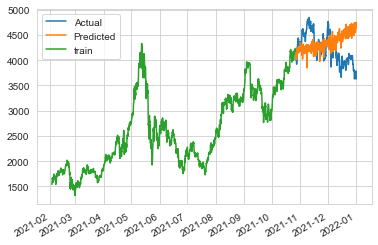

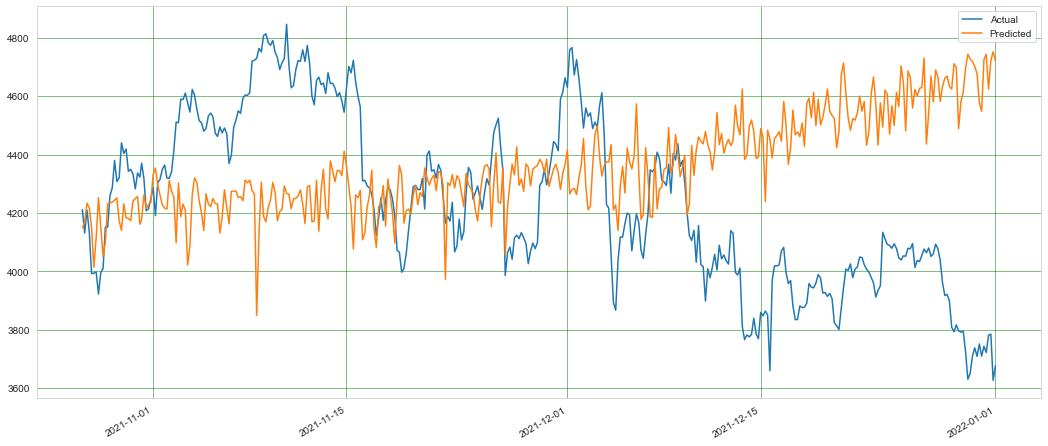

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

### Parametrs

In [63]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])
    #exog = np.empty([df6['EMA_50'], df6['EMA_200'],df6['MA_50'],df6['MA_200']])
    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=182.434
ARIMA(0, 0, 1) RMSE=190.139
ARIMA(0, 0, 2) RMSE=193.733
ARIMA(0, 1, 0) RMSE=511.230
ARIMA(0, 1, 1) RMSE=1839.388
ARIMA(0, 1, 2) RMSE=2202.798
ARIMA(0, 2, 0) RMSE=4064.571
ARIMA(0, 2, 1) RMSE=5292.206
ARIMA(0, 2, 2) RMSE=5372.810
ARIMA(1, 0, 0) RMSE=655.892
ARIMA(1, 0, 1) RMSE=2202.103
ARIMA(1, 0, 2) RMSE=4228.982
ARIMA(1, 1, 0) RMSE=8329.532
ARIMA(1, 1, 1) RMSE=3235.944
ARIMA(1, 1, 2) RMSE=4206.218
ARIMA(1, 2, 0) RMSE=5282.219
ARIMA(1, 2, 1) RMSE=5440.238
ARIMA(1, 2, 2) RMSE=10026.095
ARIMA(2, 0, 0) RMSE=12686.649
ARIMA(2, 0, 1) RMSE=914.508
ARIMA(2, 0, 2) RMSE=1945.301
ARIMA(2, 1, 0) RMSE=4913.338
ARIMA(2, 1, 1) RMSE=9088.724
ARIMA(2, 1, 2) RMSE=2514.087
ARIMA(2, 2, 0) RMSE=5372.746
ARIMA(2, 2, 1) RMSE=8119.497
ARIMA(2, 2, 2) RMSE=3734.589
ARIMA(4, 0, 0) RMSE=10046.182
ARIMA(4, 0, 1) RMSE=10742.128
ARIMA(4, 0, 2) RMSE=9634.210
ARIMA(4, 1, 0) RMSE=1660.918
ARIMA(4, 1, 1) RMSE=1379.339
ARIMA(4, 1, 2) RMSE=1268.802
ARIMA(4, 2, 0) RMSE=5589.943
ARIMA(4, 2, 1) R

In [64]:
%%time
y_pred_test = adjustDatasetPredictSARIMAX(best_cfg)

close                            4113.914062
date              2021-10-26 20:59:59.999000
Month                                     10
Day                                       26
Year                                    2021
Hour                                      20
Minutes                                   59
EMA_50                           3882.928331
EMA_200                          3444.958128
MA_50                            4038.914681
MA_200                            3543.76347
whaleCount                                 0
sentimentCount                             0
Name: 2021-10-26 20:59:59.999000, dtype: object
close                            4155.434299
date              2021-10-27 00:59:59.999000
Month                                     10
Day                                       27
Year                                    2021
Hour                                       0
Minutes                                   59
EMA_50                           3887.457463
EMA_200

close                            4191.522626
date              2021-10-29 00:59:59.999000
Month                                     10
Day                                       29
Year                                    2021
Hour                                       0
Minutes                                   59
EMA_50                           3952.194885
EMA_200                          3491.581185
MA_50                            4133.157934
MA_200                           3622.682334
whaleCount                                 0
sentimentCount                             0
Name: 2021-10-29 00:59:59.999000, dtype: object
close                             4180.91494
date              2021-10-29 04:59:59.999000
Month                                     10
Day                                       29
Year                                    2021
Hour                                       4
Minutes                                   59
EMA_50                           3956.887586
EMA_200

close                            4220.497051
date              2021-10-31 03:59:59.999000
Month                                     10
Day                                       31
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4008.590938
EMA_200                            3536.1381
MA_50                            4157.667029
MA_200                           3700.954557
whaleCount                                 1
sentimentCount                             0
Name: 2021-10-31 03:59:59.999000, dtype: object
close                             4220.86335
date              2021-10-31 07:59:59.999000
Month                                     10
Day                                       31
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4012.745959
EMA_200

close                            4243.871329
date              2021-11-02 07:59:59.999000
Month                                     11
Day                                        2
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                            4060.43301
EMA_200                          3580.139391
MA_50                             4204.39424
MA_200                            3789.14166
whaleCount                                 1
sentimentCount                             4
Name: 2021-11-02 07:59:59.999000, dtype: object
close                            4246.601592
date              2021-11-02 11:59:59.999000
Month                                     11
Day                                        2
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                            4064.02984
EMA_200

close                            4230.330823
date              2021-11-04 11:59:59.999000
Month                                     11
Day                                        4
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                            4102.48532
EMA_200                          3621.949753
MA_50                            4222.295584
MA_200                           3863.007288
whaleCount                                 6
sentimentCount                             1
Name: 2021-11-04 11:59:59.999000, dtype: object
close                            4256.171362
date              2021-11-04 15:59:59.999000
Month                                     11
Day                                        4
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4104.992095
EMA_200

close                            4242.861303
date              2021-11-06 15:59:59.999000
Month                                     11
Day                                        6
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                              4133.904
EMA_200                          3660.822288
MA_50                              4233.3948
MA_200                            3918.56671
whaleCount                                 2
sentimentCount                             6
Name: 2021-11-06 15:59:59.999000, dtype: object
close                            4245.288352
date              2021-11-06 19:59:59.999000
Month                                     11
Day                                        6
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4136.040417
EMA_200

close                            4274.457899
date              2021-11-08 19:59:59.999000
Month                                     11
Day                                        8
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4158.732061
EMA_200                          3697.396686
MA_50                            4243.247331
MA_200                           3972.494556
whaleCount                                 4
sentimentCount                            20
Name: 2021-11-08 19:59:59.999000, dtype: object
close                            4240.104944
date              2021-11-08 23:59:59.999000
Month                                     11
Day                                        8
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4161.001195
EMA_200

close                             4244.02407
date              2021-11-10 23:59:59.999000
Month                                     11
Day                                       10
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4179.411915
EMA_200                          3732.076092
MA_50                            4244.342009
MA_200                           4015.218044
whaleCount                                11
sentimentCount                            11
Name: 2021-11-10 23:59:59.999000, dtype: object
close                            4251.673353
date              2021-11-11 03:59:59.999000
Month                                     11
Day                                       11
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                            4180.67882
EMA_200

close                            4234.967758
date              2021-11-13 03:59:59.999000
Month                                     11
Day                                       13
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                            4193.57082
EMA_200                          3764.074074
MA_50                            4243.479465
MA_200                            4058.41954
whaleCount                                 3
sentimentCount                             7
Name: 2021-11-13 03:59:59.999000, dtype: object
close                            4223.758095
date              2021-11-13 07:59:59.999000
Month                                     11
Day                                       13
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4194.382525
EMA_200

close                            4217.065153
date              2021-11-15 07:59:59.999000
Month                                     11
Day                                       15
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4202.930294
EMA_200                          3793.629233
MA_50                            4241.433534
MA_200                           4105.558521
whaleCount                                 7
sentimentCount                             6
Name: 2021-11-15 07:59:59.999000, dtype: object
close                            4194.372121
date              2021-11-15 11:59:59.999000
Month                                     11
Day                                       15
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4203.207448
EMA_200

close                            4216.708928
date              2021-11-17 11:59:59.999000
Month                                     11
Day                                       17
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4205.501452
EMA_200                          3820.056709
MA_50                            4233.867212
MA_200                           4143.338423
whaleCount                                13
sentimentCount                            11
Name: 2021-11-17 11:59:59.999000, dtype: object
close                            4236.181191
date              2021-11-17 15:59:59.999000
Month                                     11
Day                                       17
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4205.721206
EMA_200

close                            4182.095574
date              2021-11-19 15:59:59.999000
Month                                     11
Day                                       19
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4206.285188
EMA_200                          3844.509718
MA_50                            4223.205987
MA_200                           4166.402246
whaleCount                                 9
sentimentCount                             2
Name: 2021-11-19 15:59:59.999000, dtype: object
close                            4216.924927
date              2021-11-19 19:59:59.999000
Month                                     11
Day                                       19
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4205.810882
EMA_200

close                            4182.509126
date              2021-11-21 19:59:59.999000
Month                                     11
Day                                       21
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4202.560972
EMA_200                          3866.220517
MA_50                             4210.84426
MA_200                           4191.879328
whaleCount                                 4
sentimentCount                             8
Name: 2021-11-21 19:59:59.999000, dtype: object
close                            4184.500369
date              2021-11-21 23:59:59.999000
Month                                     11
Day                                       21
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4202.167798
EMA_200

close                            4168.177502
date              2021-11-23 23:59:59.999000
Month                                     11
Day                                       23
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                            4196.14168
EMA_200                          3885.580082
MA_50                            4195.801679
MA_200                           4203.031896
whaleCount                                 3
sentimentCount                             7
Name: 2021-11-23 23:59:59.999000, dtype: object
close                            4169.605811
date              2021-11-24 03:59:59.999000
Month                                     11
Day                                       24
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4195.593363
EMA_200

close                            4141.202201
date              2021-11-26 03:59:59.999000
Month                                     11
Day                                       26
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4188.052779
EMA_200                          3902.857372
MA_50                            4180.361762
MA_200                           4209.721567
whaleCount                                 8
sentimentCount                             3
Name: 2021-11-26 03:59:59.999000, dtype: object
close                            4147.184341
date              2021-11-26 07:59:59.999000
Month                                     11
Day                                       26
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                            4187.13414
EMA_200

close                            4129.779663
date              2021-11-28 07:59:59.999000
Month                                     11
Day                                       28
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4177.017283
EMA_200                          3917.720852
MA_50                            4163.333274
MA_200                           4210.884379
whaleCount                                 5
sentimentCount                             5
Name: 2021-11-28 07:59:59.999000, dtype: object
close                            4130.409629
date              2021-11-28 11:59:59.999000
Month                                     11
Day                                       28
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4176.091055
EMA_200

close                            4099.194476
date              2021-11-30 11:59:59.999000
Month                                     11
Day                                       30
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4163.841584
EMA_200                          3930.392633
MA_50                            4145.956382
MA_200                           4206.007761
whaleCount                                 0
sentimentCount                             0
Name: 2021-11-30 11:59:59.999000, dtype: object
close                            4096.014949
date              2021-11-30 15:59:59.999000
Month                                     11
Day                                       30
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4162.573994
EMA_200

close                            4096.511248
date              2021-12-02 15:59:59.999000
Month                                     12
Day                                        2
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                            4149.24505
EMA_200                           3941.01896
MA_50                            4126.941827
MA_200                           4199.245414
whaleCount                                18
sentimentCount                             7
Name: 2021-12-02 15:59:59.999000, dtype: object
close                            4121.389026
date              2021-12-02 19:59:59.999000
Month                                     12
Day                                        2
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4148.211054
EMA_200

close                            4097.497676
date              2021-12-04 19:59:59.999000
Month                                     12
Day                                        4
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4137.204544
EMA_200                          3950.798145
MA_50                             4112.05013
MA_200                           4191.495822
whaleCount                                13
sentimentCount                            12
Name: 2021-12-04 19:59:59.999000, dtype: object
close                            4070.335579
date              2021-12-04 23:59:59.999000
Month                                     12
Day                                        4
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4136.425978
EMA_200

close                            4072.025001
date              2021-12-06 23:59:59.999000
Month                                     12
Day                                        6
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4124.211974
EMA_200                          3958.910737
MA_50                            4096.648261
MA_200                           4180.683021
whaleCount                                18
sentimentCount                            10
Name: 2021-12-06 23:59:59.999000, dtype: object
close                            4053.972844
date              2021-12-07 03:59:59.999000
Month                                     12
Day                                        7
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                             4123.1887
EMA_200

close                            4055.502518
date              2021-12-09 03:59:59.999000
Month                                     12
Day                                        9
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4110.749642
EMA_200                          3965.566978
MA_50                            4084.140542
MA_200                           4168.876071
whaleCount                                 9
sentimentCount                             8
Name: 2021-12-09 03:59:59.999000, dtype: object
close                            4054.324901
date              2021-12-09 07:59:59.999000
Month                                     12
Day                                        9
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4109.666365
EMA_200

close                            4028.415975
date              2021-12-11 07:59:59.999000
Month                                     12
Day                                       11
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4096.159012
EMA_200                          3970.666896
MA_50                            4068.900821
MA_200                           4156.058947
whaleCount                                 1
sentimentCount                             3
Name: 2021-12-11 07:59:59.999000, dtype: object
close                            4035.500079
date              2021-12-11 11:59:59.999000
Month                                     12
Day                                       11
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4094.830717
EMA_200

close                            4024.072077
date              2021-12-13 11:59:59.999000
Month                                     12
Day                                       13
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4082.587227
EMA_200                          3974.798833
MA_50                            4055.194481
MA_200                           4142.458349
whaleCount                                 7
sentimentCount                             5
Name: 2021-12-13 11:59:59.999000, dtype: object
close                            4073.832022
date              2021-12-13 15:59:59.999000
Month                                     12
Day                                       13
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4081.439871
EMA_200

close                            4013.519914
date              2021-12-15 15:59:59.999000
Month                                     12
Day                                       15
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4070.069132
EMA_200                          3978.131073
MA_50                            4042.299292
MA_200                           4128.256172
whaleCount                                 7
sentimentCount                             5
Name: 2021-12-15 15:59:59.999000, dtype: object
close                            4022.208582
date              2021-12-15 19:59:59.999000
Month                                     12
Day                                       15
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4068.960324
EMA_200

close                            4005.240635
date              2021-12-17 19:59:59.999000
Month                                     12
Day                                       17
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           4056.511413
EMA_200                          3980.170154
MA_50                            4028.687014
MA_200                             4113.4775
whaleCount                                 6
sentimentCount                             6
Name: 2021-12-17 19:59:59.999000, dtype: object
close                            4006.823669
date              2021-12-17 23:59:59.999000
Month                                     12
Day                                       17
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4055.506104
EMA_200

close                            3992.388201
date              2021-12-19 23:59:59.999000
Month                                     12
Day                                       19
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           4044.361111
EMA_200                          3981.619538
MA_50                             4018.37496
MA_200                            4099.27866
whaleCount                                 2
sentimentCount                             4
Name: 2021-12-19 23:59:59.999000, dtype: object
close                            3984.196433
date              2021-12-20 03:59:59.999000
Month                                     12
Day                                       20
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4043.342035
EMA_200

close                            3993.661049
date              2021-12-22 03:59:59.999000
Month                                     12
Day                                       22
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                           4030.430737
EMA_200                          3981.724978
MA_50                            4004.146278
MA_200                           4084.360899
whaleCount                                 4
sentimentCount                             8
Name: 2021-12-22 03:59:59.999000, dtype: object
close                            3970.145764
date              2021-12-22 07:59:59.999000
Month                                     12
Day                                       22
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4029.709763
EMA_200

close                            3975.836732
date              2021-12-24 07:59:59.999000
Month                                     12
Day                                       24
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           4018.709381
EMA_200                          3981.544152
MA_50                            3992.298011
MA_200                             4070.1072
whaleCount                                21
sentimentCount                             7
Name: 2021-12-24 07:59:59.999000, dtype: object
close                            3983.843118
date              2021-12-24 11:59:59.999000
Month                                     12
Day                                       24
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           4017.868741
EMA_200

close                            3951.466483
date              2021-12-26 11:59:59.999000
Month                                     12
Day                                       26
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                            4006.82657
EMA_200                          3980.625198
MA_50                            3981.229013
MA_200                           4056.130302
whaleCount                                 0
sentimentCount                             0
Name: 2021-12-26 11:59:59.999000, dtype: object
close                            3947.111152
date              2021-12-26 15:59:59.999000
Month                                     12
Day                                       26
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           4005.741078
EMA_200

close                            3956.457724
date              2021-12-28 15:59:59.999000
Month                                     12
Day                                       28
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           3994.852942
EMA_200                          3978.964376
MA_50                            3969.574352
MA_200                           4042.499191
whaleCount                                 8
sentimentCount                             7
Name: 2021-12-28 15:59:59.999000, dtype: object
close                            3951.155085
date              2021-12-28 19:59:59.999000
Month                                     12
Day                                       28
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           3994.100095
EMA_200

close                            3949.823057
date              2021-12-30 19:59:59.999000
Month                                     12
Day                                       30
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           3984.895592
EMA_200                          3977.209598
MA_50                            3961.551541
MA_200                           4029.909759
whaleCount                                15
sentimentCount                             7
Name: 2021-12-30 19:59:59.999000, dtype: object
close                            3940.956106
date              2021-12-30 23:59:59.999000
Month                                     12
Day                                       30
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           3984.207895
EMA_200

# Evaluation Measures on Test data

# MSE

In [65]:
test_mse2=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  61331.21586


# MAE

In [66]:
test_MAE2=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  191.91619


# RMSE

In [67]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  247.6514


# MAPE

In [68]:
test_mape2=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.04388


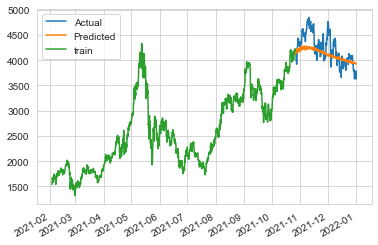

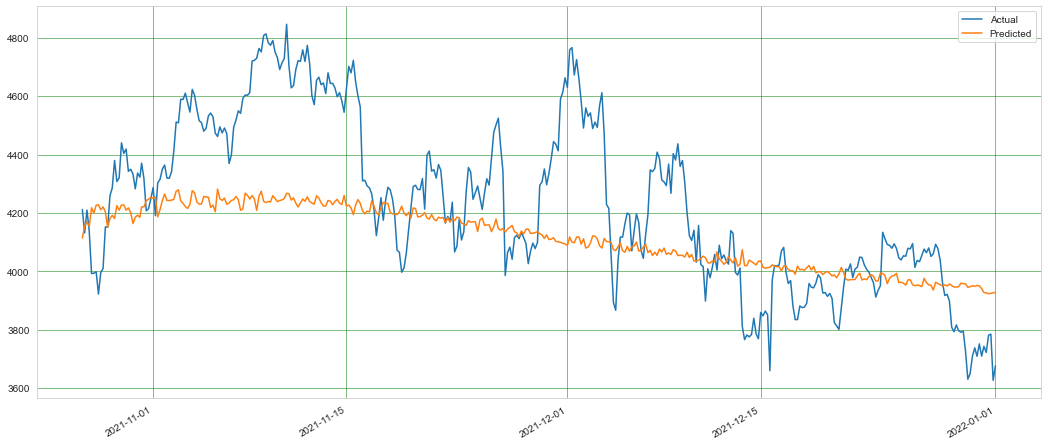

In [69]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [70]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [71]:
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 2584075.43634533
Iteration 2, loss = 1027530.42844609
Iteration 3, loss = 236548.53081334
Iteration 4, loss = 64752.72752478
Iteration 5, loss = 178876.66025270
Iteration 6, loss = 238365.81712713
Iteration 7, loss = 170396.61653455
Iteration 8, loss = 82685.34495867
Iteration 9, loss = 49937.17586753
Iteration 10, loss = 60448.36713132
Iteration 11, loss = 70793.55325162
Iteration 12, loss = 64003.53270977
Iteration 13, loss = 51587.09578737
Iteration 14, loss = 46922.85047007
Iteration 15, loss = 48518.44546118
Iteration 16, loss = 49272.01651533
Iteration 17, loss = 47364.04284135
Iteration 18, loss = 45411.17406034
Iteration 19, loss = 45195.45280067
Iteration 20, loss = 45345.08223989
Iteration 21, loss = 44823.77603519
Iteration 22, loss = 44243.50140118
Iteration 23, loss = 43845.32623519
Iteration 24, loss = 43656.81870680
Iteration 25, loss = 43329.64325198
Iteration 26, loss = 42974.93596610
Iteration 27, loss = 42709.74571037
Iteration 28, loss = 42517.63

Iteration 235, loss = 19062.79992147
Iteration 236, loss = 19046.05425361
Iteration 237, loss = 19082.92354388
Iteration 238, loss = 19097.01585434
Iteration 239, loss = 18968.74321665
Iteration 240, loss = 18992.34369400
Iteration 241, loss = 18930.72685574
Iteration 242, loss = 18925.95243286
Iteration 243, loss = 19031.15142125
Iteration 244, loss = 18905.96752243
Iteration 245, loss = 18998.16711483
Iteration 246, loss = 18914.18663216
Iteration 247, loss = 18904.95196128
Iteration 248, loss = 19091.99206521
Iteration 249, loss = 18816.58986274
Iteration 250, loss = 18910.17998915
Iteration 251, loss = 19009.30484177
Iteration 252, loss = 18918.26025402
Iteration 253, loss = 18773.95656638
Iteration 254, loss = 19066.06459267
Iteration 255, loss = 18928.20266568
Iteration 256, loss = 18886.59757594
Iteration 257, loss = 18978.56846422
Iteration 258, loss = 19077.37610873
Iteration 259, loss = 18807.97357549
Iteration 260, loss = 18760.58202451
Iteration 261, loss = 18967.19783388
I

Iteration 114, loss = 32643.64555151
Iteration 115, loss = 32785.17490065
Iteration 116, loss = 32599.35206855
Iteration 117, loss = 32449.48621935
Iteration 118, loss = 32442.59735144
Iteration 119, loss = 32365.96446686
Iteration 120, loss = 32092.22392900
Iteration 121, loss = 32054.44365412
Iteration 122, loss = 31940.63369326
Iteration 123, loss = 31921.95423871
Iteration 124, loss = 31981.55717117
Iteration 125, loss = 31754.20980817
Iteration 126, loss = 31799.29659622
Iteration 127, loss = 31794.81369824
Iteration 128, loss = 31866.71136071
Iteration 129, loss = 31637.71411268
Iteration 130, loss = 31696.89295392
Iteration 131, loss = 31654.69131549
Iteration 132, loss = 31606.07342800
Iteration 133, loss = 31586.51095370
Iteration 134, loss = 31462.61472587
Iteration 135, loss = 31479.43966016
Iteration 136, loss = 31410.90822862
Iteration 137, loss = 31348.54261539
Iteration 138, loss = 31339.49054037
Iteration 139, loss = 31309.12158903
Iteration 140, loss = 31243.70774917
I

Iteration 349, loss = 22125.94471221
Iteration 350, loss = 22165.68777119
Iteration 351, loss = 22251.14649456
Iteration 352, loss = 21916.90698104
Iteration 353, loss = 22265.30683015
Iteration 354, loss = 22009.01545456
Iteration 355, loss = 21803.82592841
Iteration 356, loss = 21762.23110429
Iteration 357, loss = 21728.61266705
Iteration 358, loss = 21712.26049904
Iteration 359, loss = 21633.81523292
Iteration 360, loss = 21586.96571834
Iteration 361, loss = 21571.27461283
Iteration 362, loss = 21875.36959371
Iteration 363, loss = 21993.20707894
Iteration 364, loss = 21368.16399914
Iteration 365, loss = 21665.23622819
Iteration 366, loss = 21660.51039909
Iteration 367, loss = 21535.46429796
Iteration 368, loss = 21907.13708528
Iteration 369, loss = 21045.43979159
Iteration 370, loss = 21434.99937883
Iteration 371, loss = 21274.74262650
Iteration 372, loss = 21291.91514837
Iteration 373, loss = 21074.78075730
Iteration 374, loss = 21120.31300359
Iteration 375, loss = 20910.50185714
I

Iteration 2, loss = 425178.19366777
Iteration 3, loss = 514639.37497955
Iteration 4, loss = 72943.29512934
Iteration 5, loss = 205504.86509331
Iteration 6, loss = 166703.53050969
Iteration 7, loss = 54623.56836897
Iteration 8, loss = 90965.01449361
Iteration 9, loss = 76538.81576130
Iteration 10, loss = 50944.57408852
Iteration 11, loss = 60010.82435974
Iteration 12, loss = 48234.98899606
Iteration 13, loss = 46276.78100957
Iteration 14, loss = 46743.01125146
Iteration 15, loss = 42240.17398507
Iteration 16, loss = 42910.73043111
Iteration 17, loss = 40597.99312107
Iteration 18, loss = 40904.92728822
Iteration 19, loss = 39647.12200433
Iteration 20, loss = 39117.93639539
Iteration 21, loss = 38423.09273721
Iteration 22, loss = 37515.93252741
Iteration 23, loss = 36687.79311480
Iteration 24, loss = 35634.49627597
Iteration 25, loss = 34311.90932648
Iteration 26, loss = 32622.52045962
Iteration 27, loss = 31203.01718172
Iteration 28, loss = 29866.53600360
Iteration 29, loss = 29328.60126

Iteration 113, loss = 22453.47162213
Iteration 114, loss = 22827.71830832
Iteration 115, loss = 22646.87140193
Iteration 116, loss = 22207.64926570
Iteration 117, loss = 21599.56398509
Iteration 118, loss = 21465.89194473
Iteration 119, loss = 21326.60715102
Iteration 120, loss = 21711.72018696
Iteration 121, loss = 21180.80512392
Iteration 122, loss = 21852.46537192
Iteration 123, loss = 21679.39711217
Iteration 124, loss = 23043.30993215
Iteration 125, loss = 21494.50852320
Iteration 126, loss = 20122.49418696
Iteration 127, loss = 20328.25821617
Iteration 128, loss = 20058.60905370
Iteration 129, loss = 19703.45408996
Iteration 130, loss = 19953.01662407
Iteration 131, loss = 19924.24762348
Iteration 132, loss = 20232.54254293
Iteration 133, loss = 20338.36740245
Iteration 134, loss = 21976.58430637
Iteration 135, loss = 20017.96514907
Iteration 136, loss = 19656.51970479
Iteration 137, loss = 19910.73310496
Iteration 138, loss = 19507.41500502
Iteration 139, loss = 19910.88356227
I

Iteration 33, loss = 38542.32708787
Iteration 34, loss = 37724.23332202
Iteration 35, loss = 36710.06703660
Iteration 36, loss = 36028.71558535
Iteration 37, loss = 35352.15220682
Iteration 38, loss = 34848.99381375
Iteration 39, loss = 34366.57825212
Iteration 40, loss = 34283.31924181
Iteration 41, loss = 34583.56762265
Iteration 42, loss = 34087.82512859
Iteration 43, loss = 33381.63558618
Iteration 44, loss = 33329.79288036
Iteration 45, loss = 33496.49873040
Iteration 46, loss = 33046.75987544
Iteration 47, loss = 32971.47190786
Iteration 48, loss = 33084.97234804
Iteration 49, loss = 33354.23519743
Iteration 50, loss = 32885.54662220
Iteration 51, loss = 33128.01470784
Iteration 52, loss = 32767.60142029
Iteration 53, loss = 32901.46748428
Iteration 54, loss = 32572.60345485
Iteration 55, loss = 32812.59349735
Iteration 56, loss = 32596.63639523
Iteration 57, loss = 33423.31836925
Iteration 58, loss = 34625.11725302
Iteration 59, loss = 34876.89854922
Iteration 60, loss = 34183.5

Iteration 20, loss = 51725.64855910
Iteration 21, loss = 51104.89339285
Iteration 22, loss = 50573.47622844
Iteration 23, loss = 49820.59598585
Iteration 24, loss = 49789.15901723
Iteration 25, loss = 48682.53208457
Iteration 26, loss = 47952.89523833
Iteration 27, loss = 46853.25736265
Iteration 28, loss = 45990.03877280
Iteration 29, loss = 44771.79635829
Iteration 30, loss = 43513.24708832
Iteration 31, loss = 41755.70157155
Iteration 32, loss = 40080.48609845
Iteration 33, loss = 38575.90115658
Iteration 34, loss = 38706.47034422
Iteration 35, loss = 37414.11620257
Iteration 36, loss = 37403.74699528
Iteration 37, loss = 36424.40526037
Iteration 38, loss = 34811.45701368
Iteration 39, loss = 34691.66717606
Iteration 40, loss = 34839.64066285
Iteration 41, loss = 34963.39641870
Iteration 42, loss = 33798.16504894
Iteration 43, loss = 33644.24519779
Iteration 44, loss = 33302.58974788
Iteration 45, loss = 32804.92294409
Iteration 46, loss = 32852.70442609
Iteration 47, loss = 32651.0

Iteration 255, loss = 12492.34484837
Iteration 256, loss = 12219.28908488
Iteration 257, loss = 12065.05064366
Iteration 258, loss = 12230.44673346
Iteration 259, loss = 12140.61611827
Iteration 260, loss = 12087.73186289
Iteration 261, loss = 12177.00030783
Iteration 262, loss = 11938.65330714
Iteration 263, loss = 12001.65120202
Iteration 264, loss = 12203.04158814
Iteration 265, loss = 11960.86293960
Iteration 266, loss = 11953.21146386
Iteration 267, loss = 11926.70795907
Iteration 268, loss = 11854.76288506
Iteration 269, loss = 11884.36342798
Iteration 270, loss = 12204.88208575
Iteration 271, loss = 12315.27708410
Iteration 272, loss = 13059.87276573
Iteration 273, loss = 13060.88834925
Iteration 274, loss = 14468.17968985
Iteration 275, loss = 12553.11575169
Iteration 276, loss = 12562.02634597
Iteration 277, loss = 13113.30792203
Iteration 278, loss = 12400.11765501
Iteration 279, loss = 12367.67584541
Training loss did not improve more than tol=0.000100 for 10 consecutive epo

Iteration 218, loss = 21880.50017204
Iteration 219, loss = 21844.80085247
Iteration 220, loss = 21759.97309462
Iteration 221, loss = 21754.11502648
Iteration 222, loss = 21707.19396304
Iteration 223, loss = 21616.18041542
Iteration 224, loss = 21565.98133302
Iteration 225, loss = 21523.48464116
Iteration 226, loss = 21489.98759451
Iteration 227, loss = 21405.93188793
Iteration 228, loss = 21367.82819694
Iteration 229, loss = 21330.43508903
Iteration 230, loss = 21234.74748070
Iteration 231, loss = 21193.37017187
Iteration 232, loss = 21225.05870012
Iteration 233, loss = 21049.79167532
Iteration 234, loss = 21074.03287329
Iteration 235, loss = 21038.70631531
Iteration 236, loss = 20957.01398596
Iteration 237, loss = 20921.38264445
Iteration 238, loss = 20830.88233683
Iteration 239, loss = 20799.54582835
Iteration 240, loss = 20709.89266741
Iteration 241, loss = 20676.88700690
Iteration 242, loss = 20636.96587796
Iteration 243, loss = 20584.63895561
Iteration 244, loss = 20519.65859348
I

Iteration 49, loss = 77343.74308133
Iteration 50, loss = 77042.81275445
Iteration 51, loss = 76753.20060492
Iteration 52, loss = 76455.36398240
Iteration 53, loss = 76162.02670536
Iteration 54, loss = 75878.17182399
Iteration 55, loss = 75604.19894210
Iteration 56, loss = 75297.11653878
Iteration 57, loss = 74985.35267135
Iteration 58, loss = 74689.78593904
Iteration 59, loss = 74371.36216964
Iteration 60, loss = 74058.75723446
Iteration 61, loss = 73723.80499879
Iteration 62, loss = 73387.18513388
Iteration 63, loss = 73043.03626390
Iteration 64, loss = 72694.31427772
Iteration 65, loss = 72352.80886807
Iteration 66, loss = 72004.21356388
Iteration 67, loss = 71659.40714216
Iteration 68, loss = 71293.76540483
Iteration 69, loss = 70923.63590501
Iteration 70, loss = 70556.28301163
Iteration 71, loss = 70188.49557074
Iteration 72, loss = 69825.76502575
Iteration 73, loss = 69446.81245781
Iteration 74, loss = 68955.43387666
Iteration 75, loss = 68491.65766830
Iteration 76, loss = 67981.7

Iteration 308, loss = 29880.85314290
Iteration 309, loss = 30040.82334021
Iteration 310, loss = 29987.84922540
Iteration 311, loss = 29715.56028632
Iteration 312, loss = 29690.88898203
Iteration 313, loss = 29694.05013364
Iteration 314, loss = 29701.78823769
Iteration 315, loss = 29849.51178118
Iteration 316, loss = 29605.06646267
Iteration 317, loss = 29626.72726089
Iteration 318, loss = 29647.79794136
Iteration 319, loss = 29584.54569136
Iteration 320, loss = 29525.87204311
Iteration 321, loss = 29503.39990544
Iteration 322, loss = 29544.81012015
Iteration 323, loss = 29518.58218256
Iteration 324, loss = 29523.20563290
Iteration 325, loss = 29380.85272914
Iteration 326, loss = 29365.48953739
Iteration 327, loss = 29356.57996664
Iteration 328, loss = 29296.03239596
Iteration 329, loss = 29312.79935455
Iteration 330, loss = 29331.40084359
Iteration 331, loss = 29242.06114760
Iteration 332, loss = 29209.84977053
Iteration 333, loss = 29171.24475697
Iteration 334, loss = 29194.18006217
I

Iteration 562, loss = 19942.90844052
Iteration 563, loss = 20085.31090673
Iteration 564, loss = 20481.64585857
Iteration 565, loss = 19948.68610053
Iteration 566, loss = 19860.07823777
Iteration 567, loss = 19618.37106824
Iteration 568, loss = 19640.27618649
Iteration 569, loss = 19647.07654099
Iteration 570, loss = 19826.06462619
Iteration 571, loss = 19566.55276006
Iteration 572, loss = 19572.64407908
Iteration 573, loss = 19569.78494728
Iteration 574, loss = 19526.44154477
Iteration 575, loss = 19601.44779951
Iteration 576, loss = 19654.78349744
Iteration 577, loss = 20018.60649830
Iteration 578, loss = 19403.32635338
Iteration 579, loss = 19662.54678153
Iteration 580, loss = 19412.27106557
Iteration 581, loss = 19510.04424764
Iteration 582, loss = 19130.91768822
Iteration 583, loss = 19524.68778999
Iteration 584, loss = 19612.41936430
Iteration 585, loss = 19207.61159475
Iteration 586, loss = 19397.13974762
Iteration 587, loss = 19248.85468902
Iteration 588, loss = 19121.85513295
I

Iteration 115, loss = 25327.43123817
Iteration 116, loss = 25676.57305645
Iteration 117, loss = 25553.33945450
Iteration 118, loss = 25620.69262395
Iteration 119, loss = 25188.44406611
Iteration 120, loss = 24541.77439035
Iteration 121, loss = 24292.15767408
Iteration 122, loss = 24118.94089054
Iteration 123, loss = 23910.03726790
Iteration 124, loss = 23791.02524073
Iteration 125, loss = 23878.57123306
Iteration 126, loss = 23502.25224716
Iteration 127, loss = 23978.88943981
Iteration 128, loss = 23671.55781399
Iteration 129, loss = 23212.62653297
Iteration 130, loss = 23197.89723792
Iteration 131, loss = 23625.82307069
Iteration 132, loss = 22691.10041155
Iteration 133, loss = 24552.12321171
Iteration 134, loss = 23127.48066769
Iteration 135, loss = 22734.69984700
Iteration 136, loss = 23667.50337780
Iteration 137, loss = 22797.57769640
Iteration 138, loss = 22596.44640879
Iteration 139, loss = 21946.07484180
Iteration 140, loss = 21349.32964465
Iteration 141, loss = 21037.20405678
I

Iteration 28, loss = 52577.38461188
Iteration 29, loss = 52112.85168879
Iteration 30, loss = 51571.08369297
Iteration 31, loss = 51039.94758848
Iteration 32, loss = 50524.13768117
Iteration 33, loss = 50007.39104030
Iteration 34, loss = 49646.17307821
Iteration 35, loss = 48911.22266770
Iteration 36, loss = 48308.30019546
Iteration 37, loss = 47636.27817847
Iteration 38, loss = 47228.94945537
Iteration 39, loss = 45985.24372155
Iteration 40, loss = 45121.84602143
Iteration 41, loss = 44233.22946713
Iteration 42, loss = 42905.01115635
Iteration 43, loss = 42076.47254219
Iteration 44, loss = 40583.42639133
Iteration 45, loss = 39700.82711268
Iteration 46, loss = 39211.54317347
Iteration 47, loss = 37641.46927913
Iteration 48, loss = 36882.52457032
Iteration 49, loss = 35735.71763794
Iteration 50, loss = 35700.52228112
Iteration 51, loss = 35128.64711187
Iteration 52, loss = 34881.09309098
Iteration 53, loss = 34545.11486387
Iteration 54, loss = 35325.53570586
Iteration 55, loss = 34961.0

Iteration 16, loss = 56821.94355356
Iteration 17, loss = 53584.49718120
Iteration 18, loss = 53326.13860301
Iteration 19, loss = 53425.57296520
Iteration 20, loss = 52389.47108678
Iteration 21, loss = 51481.40560098
Iteration 22, loss = 51290.33802453
Iteration 23, loss = 50733.27965377
Iteration 24, loss = 50160.83914266
Iteration 25, loss = 49760.59147668
Iteration 26, loss = 49342.19009895
Iteration 27, loss = 48844.45957863
Iteration 28, loss = 48398.25490999
Iteration 29, loss = 47960.23100927
Iteration 30, loss = 47496.91470083
Iteration 31, loss = 47076.27942146
Iteration 32, loss = 46621.58081726
Iteration 33, loss = 46193.07144192
Iteration 34, loss = 45745.59839634
Iteration 35, loss = 45317.87662750
Iteration 36, loss = 44929.12661536
Iteration 37, loss = 44473.04715807
Iteration 38, loss = 44045.01729564
Iteration 39, loss = 43665.43844083
Iteration 40, loss = 43216.02222699
Iteration 41, loss = 42821.52553699
Iteration 42, loss = 42413.98994048
Iteration 43, loss = 42027.5

Iteration 151, loss = 28613.45854498
Iteration 152, loss = 28755.20824954
Iteration 153, loss = 28304.49654704
Iteration 154, loss = 28387.46138420
Iteration 155, loss = 28865.78094547
Iteration 156, loss = 29059.26476808
Iteration 157, loss = 28468.30869241
Iteration 158, loss = 28374.75083677
Iteration 159, loss = 28405.03490117
Iteration 160, loss = 28700.20591549
Iteration 161, loss = 28601.69117227
Iteration 162, loss = 28341.89944589
Iteration 163, loss = 28360.12815848
Iteration 164, loss = 28397.32068299
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4662028.45921964
Iteration 2, loss = 2590237.95564860
Iteration 3, loss = 1164131.62919825
Iteration 4, loss = 368385.65957265
Iteration 5, loss = 83568.44986361
Iteration 6, loss = 100565.45105286
Iteration 7, loss = 190861.37950594
Iteration 8, loss = 213072.39744309
Iteration 9, loss = 162819.39584733
Iteration 10, loss = 98549.91305730
Iteration 11, loss = 62951.053

Iteration 222, loss = 19472.70763779
Iteration 223, loss = 19425.90997773
Iteration 224, loss = 19460.01514128
Iteration 225, loss = 19412.33870329
Iteration 226, loss = 19482.07477186
Iteration 227, loss = 19373.99829471
Iteration 228, loss = 19403.72753177
Iteration 229, loss = 19403.38130801
Iteration 230, loss = 19453.66817074
Iteration 231, loss = 19416.52617723
Iteration 232, loss = 19394.35324534
Iteration 233, loss = 19436.39229957
Iteration 234, loss = 19749.75077807
Iteration 235, loss = 19516.58219416
Iteration 236, loss = 19487.67794084
Iteration 237, loss = 19420.05170565
Iteration 238, loss = 19310.59040246
Iteration 239, loss = 19311.25999429
Iteration 240, loss = 19314.87093713
Iteration 241, loss = 19274.81164227
Iteration 242, loss = 19296.89750234
Iteration 243, loss = 19286.45960674
Iteration 244, loss = 19293.78612227
Iteration 245, loss = 19298.09787062
Iteration 246, loss = 19252.99739951
Iteration 247, loss = 19299.63783304
Iteration 248, loss = 19237.93930805
I

Iteration 122, loss = 32425.63443295
Iteration 123, loss = 32395.34418434
Iteration 124, loss = 32428.19017928
Iteration 125, loss = 32389.20007095
Iteration 126, loss = 32186.27015261
Iteration 127, loss = 32130.18127638
Iteration 128, loss = 32036.92606822
Iteration 129, loss = 32115.78963764
Iteration 130, loss = 31994.16303834
Iteration 131, loss = 31977.99227581
Iteration 132, loss = 31999.48833011
Iteration 133, loss = 31843.17964294
Iteration 134, loss = 31790.61936834
Iteration 135, loss = 31788.92677020
Iteration 136, loss = 31766.76194838
Iteration 137, loss = 31627.94034540
Iteration 138, loss = 31580.51691618
Iteration 139, loss = 31471.63413729
Iteration 140, loss = 31477.90119883
Iteration 141, loss = 31177.94775755
Iteration 142, loss = 31109.18036533
Iteration 143, loss = 31072.09721074
Iteration 144, loss = 31021.01968621
Iteration 145, loss = 30919.84131519
Iteration 146, loss = 30996.58138263
Iteration 147, loss = 30983.01402492
Iteration 148, loss = 30932.92672078
I

Iteration 357, loss = 20189.54248349
Iteration 358, loss = 20186.80074109
Iteration 359, loss = 20184.01696730
Iteration 360, loss = 20062.19424326
Iteration 361, loss = 19941.20490495
Iteration 362, loss = 19910.86977830
Iteration 363, loss = 19845.87489511
Iteration 364, loss = 19768.51115766
Iteration 365, loss = 19828.65204204
Iteration 366, loss = 19641.97288393
Iteration 367, loss = 19627.45979971
Iteration 368, loss = 20192.67882188
Iteration 369, loss = 20177.08611980
Iteration 370, loss = 19542.01953340
Iteration 371, loss = 19500.55819087
Iteration 372, loss = 19635.21666962
Iteration 373, loss = 20033.06031293
Iteration 374, loss = 19515.55799244
Iteration 375, loss = 19648.38884004
Iteration 376, loss = 19059.71940124
Iteration 377, loss = 19490.66094071
Iteration 378, loss = 19533.75282655
Iteration 379, loss = 19852.25565990
Iteration 380, loss = 19087.41788952
Iteration 381, loss = 19038.33726578
Iteration 382, loss = 19608.77080183
Iteration 383, loss = 19263.43189280
I

Iteration 82, loss = 21847.85317773
Iteration 83, loss = 21670.70163864
Iteration 84, loss = 21652.33303261
Iteration 85, loss = 21409.95046524
Iteration 86, loss = 21272.26454131
Iteration 87, loss = 21207.64944631
Iteration 88, loss = 21228.50523810
Iteration 89, loss = 21159.06221449
Iteration 90, loss = 21025.27349633
Iteration 91, loss = 21143.60287737
Iteration 92, loss = 20942.80096471
Iteration 93, loss = 20838.38569933
Iteration 94, loss = 20528.77934477
Iteration 95, loss = 20514.56768388
Iteration 96, loss = 20687.64971436
Iteration 97, loss = 20490.27364314
Iteration 98, loss = 20383.75295474
Iteration 99, loss = 20506.66406834
Iteration 100, loss = 20332.65779616
Iteration 101, loss = 20326.83157354
Iteration 102, loss = 20312.42690672
Iteration 103, loss = 20184.76636177
Iteration 104, loss = 20206.25952880
Iteration 105, loss = 20148.51368172
Iteration 106, loss = 20148.91295604
Iteration 107, loss = 19950.79517711
Iteration 108, loss = 20009.14240268
Iteration 109, loss

Iteration 165, loss = 28183.34870408
Iteration 166, loss = 27598.18287214
Iteration 167, loss = 27949.83302518
Iteration 168, loss = 27862.41303180
Iteration 169, loss = 27938.53905133
Iteration 170, loss = 27551.19849628
Iteration 171, loss = 27921.39253963
Iteration 172, loss = 27512.01220368
Iteration 173, loss = 27568.97122568
Iteration 174, loss = 27490.80195612
Iteration 175, loss = 27329.82614392
Iteration 176, loss = 27266.97375108
Iteration 177, loss = 27211.80311332
Iteration 178, loss = 27196.12342115
Iteration 179, loss = 27437.39023703
Iteration 180, loss = 27224.92788104
Iteration 181, loss = 27372.07053660
Iteration 182, loss = 27051.59776104
Iteration 183, loss = 27136.39290526
Iteration 184, loss = 27033.22278701
Iteration 185, loss = 27095.76512815
Iteration 186, loss = 27025.70234053
Iteration 187, loss = 26839.63105747
Iteration 188, loss = 26988.22666308
Iteration 189, loss = 26757.11428184
Iteration 190, loss = 26677.00397698
Iteration 191, loss = 26743.61178537
I

Iteration 108, loss = 26966.74587775
Iteration 109, loss = 27077.49032947
Iteration 110, loss = 25011.35402854
Iteration 111, loss = 23952.35809450
Iteration 112, loss = 23467.53776610
Iteration 113, loss = 23480.06926399
Iteration 114, loss = 23733.01541491
Iteration 115, loss = 23811.43367489
Iteration 116, loss = 23596.01748264
Iteration 117, loss = 23377.24895068
Iteration 118, loss = 23459.74870462
Iteration 119, loss = 24033.63782507
Iteration 120, loss = 23999.58415684
Iteration 121, loss = 23413.89696607
Iteration 122, loss = 23144.92198964
Iteration 123, loss = 23280.83254028
Iteration 124, loss = 23116.91203349
Iteration 125, loss = 23050.22506797
Iteration 126, loss = 23425.31598188
Iteration 127, loss = 23015.37709854
Iteration 128, loss = 23251.62815300
Iteration 129, loss = 23417.33480581
Iteration 130, loss = 23261.31536656
Iteration 131, loss = 23087.53239620
Iteration 132, loss = 23069.18514965
Iteration 133, loss = 22888.26041196
Iteration 134, loss = 22841.20537312
I

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [72]:
Model_R.best_params_

{'momentum': 0.7,
 'max_iter': 300,
 'learning_rate_init': 0.004,
 'hidden_layer_sizes': (100,)}

# Evaluation Measures on Test data

# MSE

In [73]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  371527.6165
Wall time: 21.5 s


# MAE

In [74]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  561.74718


# RMSE

In [75]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  609.53065


# MAPE

In [76]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.13304


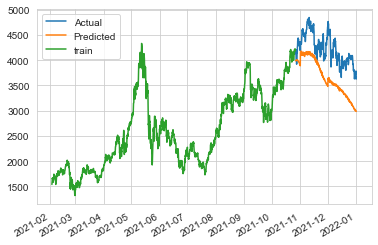

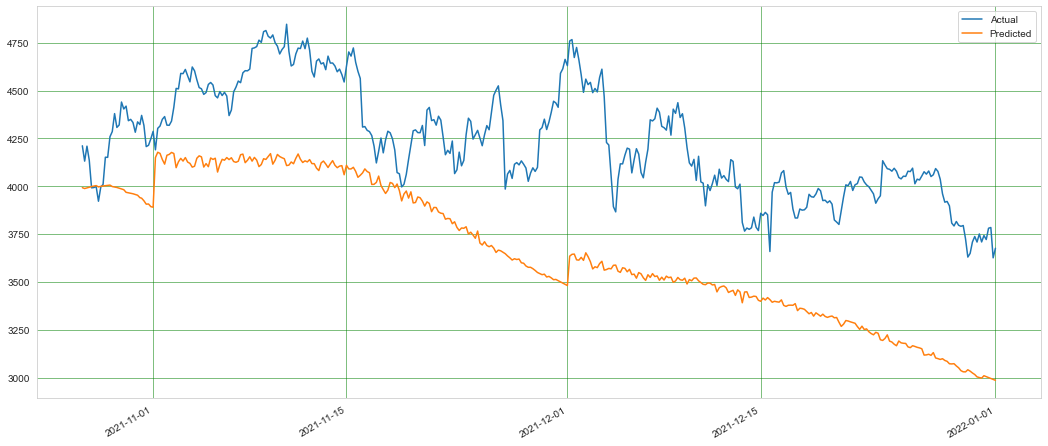

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [78]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [79]:
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [80]:
Model_R.best_params_

{'tol': 0.004, 'max_iter': 300, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [81]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  525554.85028
Wall time: 21.6 s


# MAE

In [82]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  684.52621


# RMSE

In [83]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  724.95162


# MAPE

In [84]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.16083


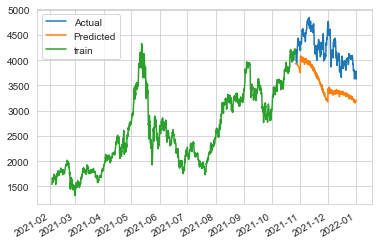

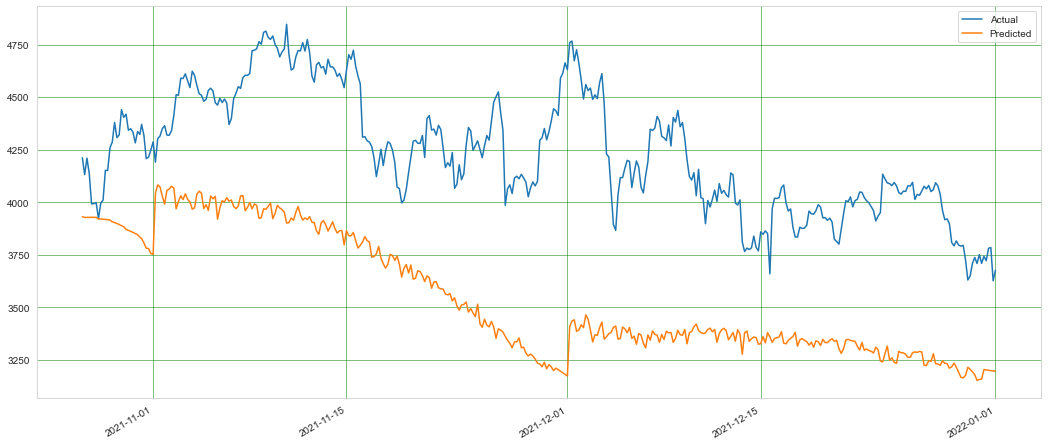

In [85]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [86]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [87]:
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [88]:
Model_R.best_params_

{'random_state': 30, 'min_samples_leaf': 50, 'max_depth': 50}

# Evaluation Measures on Test data

# MSE

In [89]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  173405.44275
Wall time: 24 s


# MAE

In [90]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  337.57953


# RMSE

In [91]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  416.41979


# MAPE

In [92]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.07653


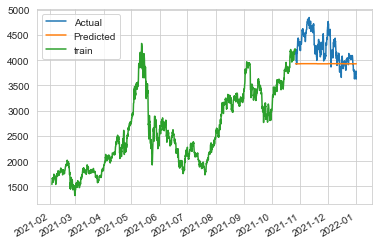

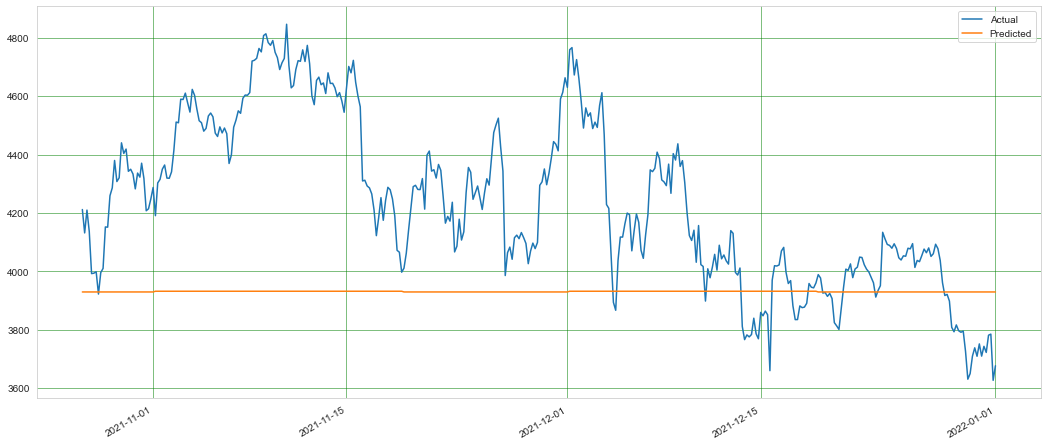

In [93]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [94]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [95]:
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [96]:
Model_R.best_params_

{'n_estimators': 100, 'max_depth': 40, 'learning_rate': 0.3, 'base_score': 0.4}

# Evaluation Measures on Test data

# MSE

In [97]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  111152.62031
Wall time: 33.3 s


# MAE

In [98]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  265.43301


# RMSE

In [99]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  333.39559


# MAPE

In [100]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.06111


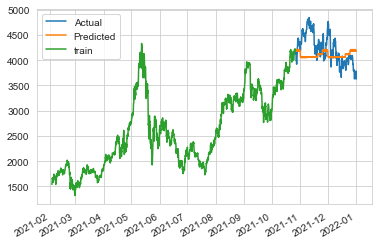

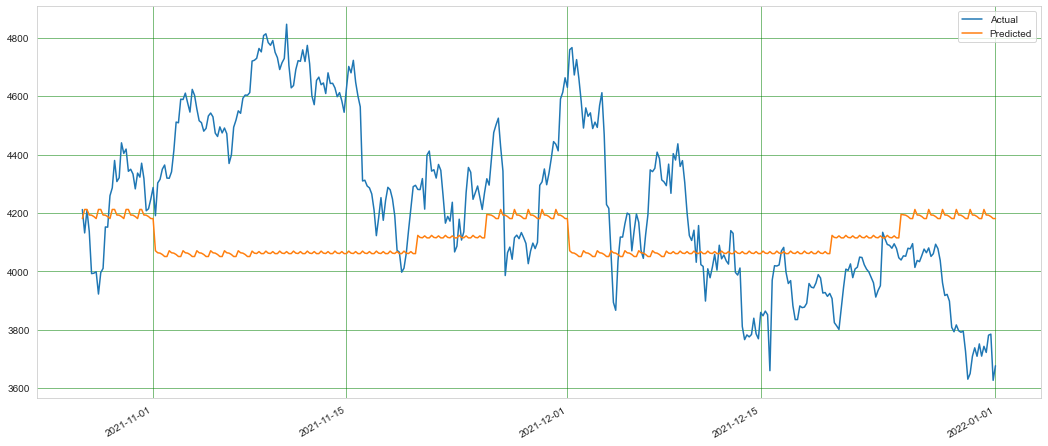

In [101]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [102]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 

print(x) # printing the table



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MSE score  |
+-------------------------+------------+
|     ARIMAX Algorithm    | 180089.522 |
|    SARIMAX Algorithm    | 61331.216  |
|      MLP Algorithm      | 371527.616 |
|     Ridge Algorithm     | 525554.85  |
| Random Forest Algorithm | 173405.443 |
|      XGB Algorithm      | 111152.62  |
+-------------------------+------------+


# Comparison of all algorithms Results on MAE score

In [103]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["ARIMAX Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 

print(x) # printing the table



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|     ARIMAX Algorithm    |  342.062  |
|    SARIMAX Algorithm    |  191.916  |
|      MLP Algorithm      |  561.747  |
|     Ridge Algorithm     |  684.526  |
| Random Forest Algorithm |   337.58  |
|      XGB Algorithm      |  265.433  |
+-------------------------+-----------+


# Comparison of all algorithms Results on RMSE score

In [104]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|     ARIMAX Algorithm    |   424.37   |
|    SARIMAX Algorithm    |  247.651   |
|      MLP Algorithm      |  609.531   |
|     Ridge Algorithm     |  724.952   |
| Random Forest Algorithm |   416.42   |
|      XGB Algorithm      |  333.396   |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [105]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|     ARIMAX Algorithm    |   0.083    |
|    SARIMAX Algorithm    |   0.044    |
|      MLP Algorithm      |   0.133    |
|     Ridge Algorithm     |   0.161    |
| Random Forest Algorithm |   0.077    |
|      XGB Algorithm      |   0.061    |
+-------------------------+------------+


